**Chosen Research Space**: Outer Space Exploration

**Aim** : Learn more about the Space Race between the United States of America and the Soviet Union(USSR), overall trends in space missions and current points of interest in the outer space exploration field.

**Why** : There are geopolitical conflicts taking place around the world currently, with Ukraine and Russia, and the United States of America condemning Russia for it. I wanted to explore a time when geopolitical tensions allowed for rapid innovation and propelled humanity further into the final frontier, Outer Space. Also known as the Space Race,  which took place from 2 Aug 1955 – 17 Jul 1975. During this time, we see the US and Russia(then USSR), compete to achieve superior spaceflight capability.

**Acquired Datasets**: 

- **Kaggle dataset - All Space Missions from 1957**, scrapped from another website: https://nextspaceflight.com/launches/past/?page=1  and includes all the space missions since the beginning of Space Race (1957)

- **2 Space News websites** have also been web scrapped towards the end of this report: (https://www.spacedaily.com/ and https://www.space.com/ )

**Justification of All Space Missions from 1957 dataset:**
For the analysis of the space race between the USA and the USSR, I will need to analyse the number of missions conducted by the two countries and the outcomes of those missions, which are present in this dataset. Ideally, I would have liked to conduct some Exploratory Data Analysis(EDA) on the cost of the missions undertaken by the countries but as I will soon elucidate, this is not possible with this dataset, which is one of its limitations. The dataset will first be inspected to see what needs to be cleaned out and what needs to be manipulated for ease of use. Following which EDA will be performed on it to see general trends and Space Race trends. 

**Relevant column headings:** Location, Datum, Status Mission (for the USA vs USSR analysis mainly). The other columns help with the overall trend analysis. 

Data format of CSV is suitable for analysis here as it can be turned into a dataframe using the Pandas library for data manipulation and sorting for better understanding of the dataset we have and more accurate visualisations.

After the above is done, web scraping will be performed on two news sites to obtain the words found on those pages and the words will be appended to a variable which will be run through the wordcloud library’s WordCloud function to create a word cloud visualisation.

For https://www.spacedaily.com, these HTML elements have been scrapped:
- h3.article-name 
- p.synopsis
- a.popular-box__article-list__link
- span.article-name 

For https://www.space.com/, these HTML elements have been scrapped:
- a.fullstory 
- span.bntx


**Ethics:** 

- The Kaggle dataset is open source and therefore is permitted to be used for personal usage cases. 
As for the news sites I am web scrapping, while the content is copyrighted, under the US copyright law that both websites used are registered under, as long as the information scraped isn't protected by a login, it's legal to scrape and as I am using this for academic purposes which is not meant for profit gain or enterprise usage. Therefore it is ethical to scrape these sites. 

- The Kaggle dataset is scrapped from another website which is a Western-run site, like the news sites I am using for web scrapping, so there are some chances of certain biases existing which could support the western countries as opposed to countries like Russia. However, considering most of the news reported and historical data provided are heavily technical, it is not that easy to ingrain bias into it, except news sites where they can spin off technical statistics into different political views. However, as we are not doing sentiment analysis on the news data, we do not need to heavily consider this bias. 


**Two other data datasets and their potential:** 

- https://www.statista.com/statistics/1169834/space-exploration-missions-worldwide-type/. It is a dataset for Projected space exploration missions from 2020 to 2030, by type. While this could assist with EDA of overall trends in space missions, it wouldn’t necessarily be helping me with exploration of the Space Race mainly and the future is not always predictable especially when there are disruptive technologies like Generative AI that are advanced at a rapid rate, so I chose to rather web scrape data from news sites to get a glimpse into progress that is in closer time proximity to now. Perhaps, if this project had a heavier emphasis on exploring the future, perhaps we could web-scrape blogs and opinion sites to do natural language processing on it and thereby, by comparison, do some sentiment analysis.

- https://www.planetary.org/space-policy/planetary-exploration-budget-dataset. This is the Planetary Exploration Budget Dataset. While it is a comprehensive dataset, it only covers the missions undertaken by NASA and does not give information on the cost of missions that are not run by NASA(commonly associated with the USA). Perhaps, this dataset could be useful in analysing the USA’s expenditure over time on its space missions and would come in very handy if there was one present for Russia’s spending as well as it is a key player in this project’s comparison aims.

**Strengths of the chosen research topic:**

1. Historical Significance: The space race was a pivotal moment in history, shaping global politics, technological advancements, and scientific achievements. Analysing this period allows us to derive insights into geopolitical and international competition. Additionally, outer space exploration is a fascinating area of study where many innovations that arose from it have trickled down into everyday items of usage such as the GPS devices used in vehicles. 
2. Public Interest: Space missions have captured the public imagination for decades. Analyzing this topic can attract interest from a wide audience, making it relevant and engaging. Considering space is the final frontier for humanity, interesting insights are derived from it and can encourage future generations to push for more advancement in the area. 
3. Personal Interest: Outer Space has always fascinated me since my father showed me a book on the Solar system and planetary illustrations. Additionally, as I have taken a special interest recently in international affairs, I found it be to only fitting to do analysis of the space race between USA and USSR. 

**Weaknesses of the chosen research topic:**

1. Limitations in Contemporary Data: While we can derive historical data, scraping news sites for contemporary discussions may present challenges like language nuances which can affect sentiment analysis and identifying credible sources can be difficult, which is why multiple sources should be used when collecting data for analysis.

2. Scope and Focus: The vastness of the topic might make it challenging to maintain a focused analysis. It could be easy to veer off into unrelated or less relevant tangents without a clear research framework. Which is why I have taken a macro and micro focus. Macro in terms of finding out about general trends and what is being talked about now and micro is a focus on the US and USSR space race. 


## With the justification of datasets done, let us move forward with the technical data analysis

In [1]:
#Import the necessary libraries
import requests
from IPython.display import Image, display
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from wordcloud import WordCloud

## Let us get into the mood for space mission analysis by having a look at NASA's Astronomy Picture of the Day!

In [2]:
#NASA APOD API CALL

#We use the demo key here instead of the developer key to ensure API Key security.
#For more information on demo key limits,check: https://api.nasa.gov/
NASA_API_KEY = 'DEMO_KEY'

#NASA's astronomy picture of the day url (APOD)
APOD_URL = f'https://api.nasa.gov/planetary/apod?api_key={NASA_API_KEY}'

#GET request to retrieve the data
response = requests.get(APOD_URL)

#status code for successful request is 200
if response.status_code == 200:
    # Convert response to JSON
    data = response.json()  
    # Extract image URL from JSON data
    image_url = data['url']
    # Display image 
    display(Image(url=image_url))
    # Print title of image
    print("Astronomy Picture of the Day:", data['title'])
else:
    print("Failed to fetch image, potential internet connection error")

Astronomy Picture of the Day: The Light, the Dark, and the Dusty


## Let us now begin with the first dataset from Kaggle: All Space Missions from 1957

In [6]:
#Upload the CSV dataset
raw_df = pd.read_csv("archive/SpaceMissionsFrom1957.csv")

Let's explore our dataset to understand it better before we do some analysis. We shall start by seeing the first and last 5 rows of the dataset.



In [7]:
#Top 5 rows of data
raw_df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [8]:
#Bottom 5 rows of data
raw_df.tail()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [10]:
#Remove redundant columns - Unnamed:0.1 and Unnamed:0

#Define the columns to remove
columns_to_remove = ['Unnamed: 0.1', 'Unnamed: 0']

#Create new dataframe that has the columns removed
SpaceMissionsdf_U1 = raw_df.drop(columns=columns_to_remove, axis=1)

#Print new dataframe
SpaceMissionsdf_U1.head(10)


,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


As seen above from the head and tail, there is quite a number of Not a Number values present in the Rocket column. 
Let us calculate the frequency of NaN values and see if we have a reason to drop the associated rows. 

### The following code was what I tried to implement but it does not work, we find out why in the next code block

missing_values_rocket = SpaceMissionsdf_U1['Rocket'].isnull().sum()  
total_rows = len(SpaceMissionsdf_U1)  
percentage_missing_rocket = (missing_values_rocket / total_rows) * 100  
print("Percentage of missing values in 'Rocket':", percentage_missing_rocket)  

From the error, what I got was KeyError: 'Rocket'


In [11]:
#Print column titles

print(SpaceMissionsdf_U1.columns)

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')


In [13]:
#column titled Rocket actually is " Rocket" with a space before the word, hence causing the error.
#adjust original code

missing_values_rocket = SpaceMissionsdf_U1[' Rocket'].isnull().sum()
total_rows = len(SpaceMissionsdf_U1)
percentage_missing_rocket = round((missing_values_rocket / total_rows) * 100 , 1)

print("Percentage of missing values in 'Rocket':", percentage_missing_rocket,"%")

Percentage of missing values in 'Rocket': 77.7 %


### Upon further inspection of the data that was scraped from the https://nextspaceflight.com/launches/, I found that the column Rocket denotes the cost of the Rocket in the mission and there are some discrepancies:

- Cross checking the data from the dataframe head against the information on the site, the column Rocket indicates the Cost of the particular mission. 
- Some of the values are either missing(NaN) or have slight deviations from the amount presented on the website now. 
- A potential reason is, when the website was scrapped, this information was either not available or a more accurate number was updated after the initial date of scrapping. 

Therefore, taking note of this, the NaN rows of Rocket will not be dropped but the Cost of the missions is an aspect I will not be analysing from this dataset as it does not have a high level of accuracy. 

In [14]:
#As the column titles are not clear, we will rename them

new_column_names = {
    'Datum': 'Date of Mission',
    'Status Rocket': 'Rocket Status',
    ' Rocket': 'Cost',
    'Status Mission':'Mission Status'
}

SpaceMissionsdf_U1.rename(columns=new_column_names, inplace=True)

print("DataFrame with renamed columns:")
print(SpaceMissionsdf_U1.head(3))

DataFrame with renamed columns:
  Company Name                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   

              Date of Mission                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   

  Rocket Status    Cost Mission Status  
0  StatusActive   50.0         Success  
1  StatusActive  29.75         Success  
2  StatusActive     NaN        Success  


### Now let us check for duplicates as each mission should be unique

In [15]:
# Check for duplicates in a column
duplicates = SpaceMissionsdf_U1[SpaceMissionsdf_U1.duplicated(subset='Detail', keep=False)]
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
     Company Name                                           Location  \
365           MHI             LA-Y1, Tanegashima Space Center, Japan   
515           ISA  Imam Khomeini Spaceport, Semnan Space Center, ...   
519           MHI             LA-Y1, Tanegashima Space Center, Japan   
632           ISA  Imam Khomeini Spaceport, Semnan Space Center, ...   
646           ISA  Imam Khomeini Spaceport, Semnan Space Center, ...   
...           ...                                                ...   
3730      OKB-586        Site 41/15, Baikonur Cosmodrome, Kazakhstan   
3733    RVSN USSR        Site 81/23, Baikonur Cosmodrome, Kazakhstan   
3787           UT                      Uchinoura Space Center, Japan   
3813           UT                      Uchinoura Space Center, Japan   
3840           UT                      Uchinoura Space Center, Japan   

                 Date of Mission                       Detail  Rocket Status  \
365   Fri Mar 17, 2017 01:20 UTC      H

### Upon closer inspection, we find that the duplicates exist due to same prior missions being failures and therefore it is rational for us to allow those rows to exist.

## Overall Trend - Number of Space Missions Over Time

In [74]:
#For ease of use of dataframe, convert 'Date of Mission' column to datetime
SpaceMissionsdf_U1['Date of Mission'] = pd.to_datetime(SpaceMissionsdf_U1['Date of Mission'], errors='coerce')

#Extract year from Date of Mission column
#Count occurrences of each unique year
#Sort the years in ascending order
#Reset the index of resulting pandas series to create a new dataframe called missions_per_year
missions_per_year = SpaceMissionsdf_U1['Date of Mission'].dt.year.value_counts().sort_index().reset_index()

#Rename columns of missions_per_year dataframe for easier axis allocation
missions_per_year.columns = ['Year', 'Number of Missions']

#line chart 
fig = px.line(missions_per_year, x='Year', y='Number of Missions', markers=True, title='Number of Space Missions Over Time')
fig.update_traces(mode='lines + markers')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Missions', hovermode='x unified') 
fig.show()

### Findings:

- In accordance to the space race period, the number of launches increase rapidly from the late 1950s to the late 1970s. 
- There is a huge dip from 1978 to 1979, likely caused as an aftereffect of the April 1972 agreement on a cooperative Apollo–Soyuz Test Project (ASTP), resulting in the July 1975 rendezvous in Earth orbit of a US astronaut crew with a Soviet cosmonaut crew and joint development of an international docking standard APAS-75. 
- The above is what led to the end of the space rivalry in 1975.
- From 1979 to 2015, the number of missions remained relatively stagnant.
- From 2015 onwards, there is a large spike in space missions. 

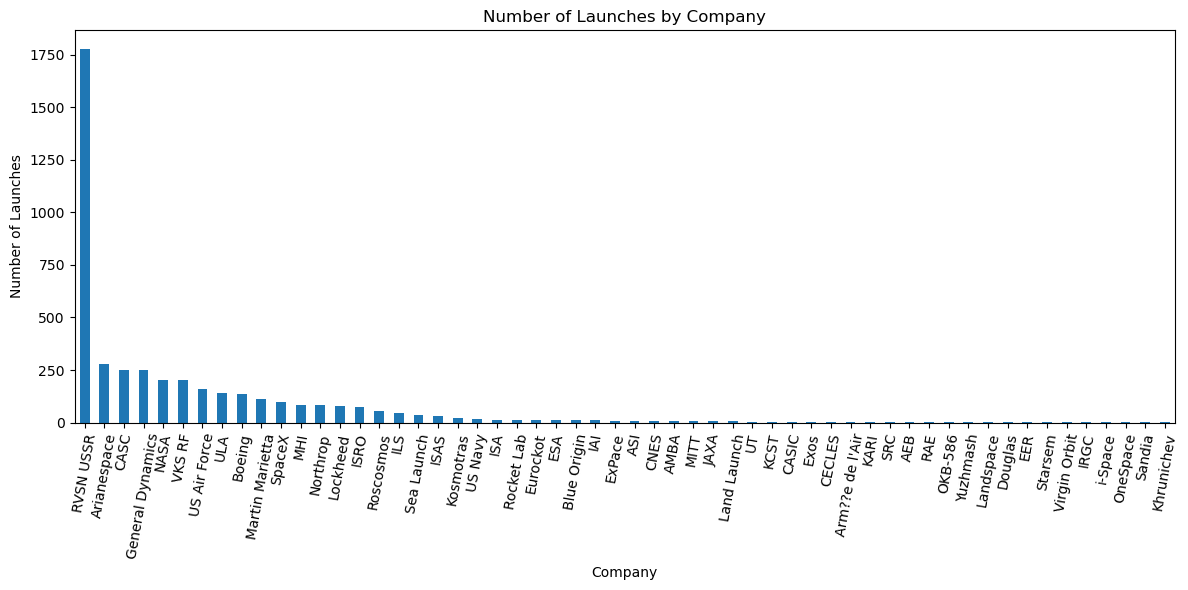

In [46]:
## Overall Trend - Number of Launches by Company

#Count number of launches for each company and store in launches_by_company dataframe 
launches_by_company = SpaceMissionsdf_U1['Company Name'].value_counts()

#Plot bar graph
plt.figure(figsize=(12, 6)) 
launches_by_company.plot(kind='bar')
plt.title('Number of Launches by Company')
plt.xlabel('Company')
plt.ylabel('Number of Launches')

#Tilt for better readability
plt.xticks(rotation=80)  

#Prevent cutting off labels
plt.tight_layout()  
plt.show()

In [47]:
SpaceMissionsdf_U1.head()

,Company Name,Location,Date of Mission,Detail,Rocket Status,Cost,Mission Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [62]:
#Launches by Country - Top 10

#Inspecting the head above, we see the country is the last part of the location element string after the comma

#Extract the country from the 'Location' column using the following lambda function and store into new column "Country"
SpaceMissionsdf_U1['Country'] = SpaceMissionsdf_U1['Location'].apply(lambda x: x.split(",")[-1].strip())

#Group by "Country" and count number of launches for each country
#Reset index to create new dataframe for easier plot axis input
launches_by_country = SpaceMissionsdf_U1['Country'].value_counts().reset_index()
launches_by_country.columns = ['Country', 'Number of Launches']

# Create bar graph for top 10 countries
fig = px.bar(launches_by_country.head(10), 
             x='Country',
             y='Number of Launches', 
             title='Top 10 Countries by Number of Launches', 
             labels={'Number of Launches': 'Number of Launches'})

fig.update_layout(xaxis_title='Country', 
                  yaxis_title='Number of Launches', 
                  xaxis_tickangle=-45)
fig.show()

### Findings:
- A limitation of the dataset is certain outliers like the pacific ocean, where we are unable to group it together under any existing country pop up. 
- We can see how fierce the rivalry between Russia and USA is by how neck and neck they are in terms of launches, very likely propelled by the space race between them.
- Kazakhstan has a significant amount of launches as they were part of the Soviet Union and only gained independence after the dissolution of the Soviet Union in 1991.
- Countries like China and India are starting to place their impression on the map as they are emerging countries with huge economies, leaving their mark on space exploration.


In [49]:
#Find out the distinct elements in the Mission Success column, as only Success and Failure can be seen from the head data.

print(SpaceMissionsdf_U1['Mission Status'].unique())


['Success' 'Failure' 'Prelaunch Failure' 'Partial Failure']


### Mission Status Category breakdown for USA and USSR/Russia

In [52]:
# Filtering data for USA and Russia
USA_data = SpaceMissionsdf_U1[SpaceMissionsdf_U1['Country'] == 'USA']
RUSSIA_data = SpaceMissionsdf_U1[SpaceMissionsdf_U1['Country'] == 'Russia']

# Function to count mission success categories' occurences
def count_mission_success(dataframe):
    return dataframe['Mission Status'].value_counts()

# Counting mission success categories for USA and Russia
usa_success_counts = count_mission_success(USA_data)
russia_success_counts = count_mission_success(RUSSIA_data)

#Make piecharts
PieChart_USA = px.pie(values=usa_success_counts.values, names=usa_success_counts.index, title='Mission Status Categories - USA')
PieChart_RUSSIA = px.pie(values=russia_success_counts.values, names=russia_success_counts.index, title='Mission Status Categories - USSR/RUSSIA')

# Show piecharts
PieChart_USA.show()
PieChart_RUSSIA.show()

### Analysis:
- USSR overall has higher complete success rate compared to USA, with lower rates of partial failures and complete failures

### Mission Status Over Time Breakdown for USA and USSR/Russia

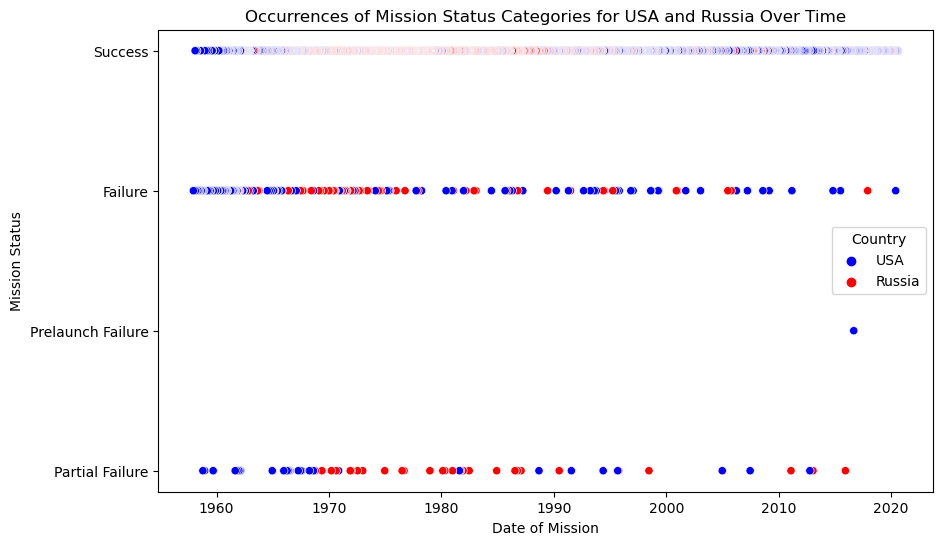

In [51]:
# Filter data for USA and Russia
usa_russia_data = SpaceMissionsdf_U1[SpaceMissionsdf_U1['Country'].isin(['USA', 'Russia'])]

# Plot scatter plot for occurrences of each mission status category for USA and Russia over time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=usa_russia_data, x='Date of Mission', y='Mission Status', hue='Country', palette={'USA': 'blue', 'Russia': 'red'})
plt.title('Occurrences of Mission Status Categories for USA and Russia Over Time')
plt.xlabel('Date of Mission')
plt.ylabel('Mission Status')
plt.legend(title='Country')
plt.show()

### Note: The lighter the colour, the higher the frequency of the respective Mission Status

### Analysis:
- USA started off the space race in 1957, which the USSR(now Russia) promptly took the lead with the number of successful space missions as seen between the late 1960s to the late 1980s, where the USA begins to take the lead once again. 
- This also coincides with the fall of the Soviet Union On December 25, 1991.
- Additionally, we can also see the while the countries took lead during the respective times mentioned above in terms of successful missions, the number of Partial failures and failures that came about as a mission outcome also increased during these time periods. 

### Find out what the buzz is now when it comes to outer space exploration!

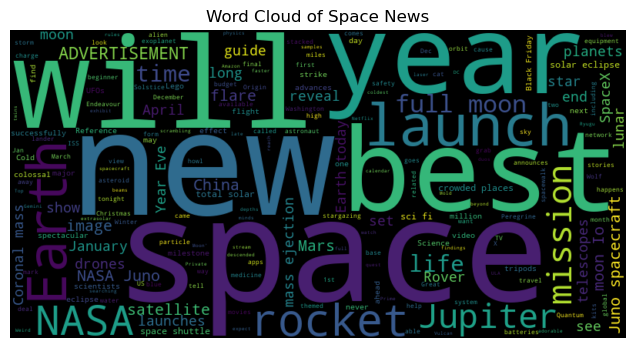

In [73]:
##################
#First News Site
##################

# URL of space.com
site_url_1 = 'https://www.space.com/'

# Send GET request to fetch HTML content 
response = requests.get(site_url_1)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse HTML content
    soup_1 = BeautifulSoup(response.content, 'html.parser')

    # Find h3.article-name and p.synopsis
    article_names = soup_1.find_all('h3', class_='article-name')
    synopses = soup_1.find_all('p', class_='synopsis')

    # Find a.popular-box__article-list__link and span.article-name
    popular_links = soup_1.find_all('a', class_='popular-box__article-list__link')
    spans = soup_1.find_all('span', class_='article-name')

    # Collect text from found elements
    news_text = ''
    for element in [article_names, synopses, popular_links, spans]:
        for k in element:
            news_text += k.get_text() + ' '

else:
    print("Failed to retrieve data from www.space.com")
            
##################
#Second News Site
##################
site_url_2 = 'https://www.spacedaily.com/'

#Send GET request to fetch HTML content for second site
response_2 = requests.get(site_url_2)

#Check if the request was successful (status code 200)
if response_2.status_code == 200:
    #Parse HTML content
    soup_2 = BeautifulSoup(response_2.content, 'html.parser')

    #Find a.fullstory and span.bntx elements from the second website
    full_story_links = soup_2.find_all('a', class_='fullstory')
    span_bntx = soup_2.find_all('span', class_='bntx')

    #Collect text from elements of the second website
    news_text_2 = ''
    for element in [full_story_links, span_bntx]:
        for i in element:
            news_text_2 += i.get_text() + ' '

    # Append the text from the second website to the existing news_text
    news_text += news_text_2
    
else:
    print('Failed to retrieve data from www.spacedaily.com') 
    

##################
#Create word cloud
##################

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(news_text)

# Display word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Space News')
plt.show()



### From this word cloud, we can see the most up to date talks about outer space exploration and the terms associated with it the most. 

During the time of writing this report, it was the New Year celebration of 2024 where the biggest words in the word cloud were "New Year, Space, NASA, Launch, Earth, Rocket at Jupiter".


# With that, we have come to the end of this project report. 

# Hope you enjoyed viewing this report and hope it conveyed my aims and objectives! Thank you and have a good day! :D